In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# MATRIX PROFILE

In [3]:
df = pd.read_csv("ts_approx.csv")

In [4]:
df

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,2.793219,2.793219,3.610551,3.610551,2.830355,2.830355,0.422104,0.422104,0.425833,...,-0.870211,-0.901810,-0.901810,-0.834588,-0.834588,-0.669062,-0.669062,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1.114611,1.114611,2.161272,2.161272,2.231768,2.231768,1.308837,1.308837,-0.050024,...,-0.652843,-0.866491,-0.866491,-0.925478,-0.925478,-0.995256,-0.995256,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,2.400311,2.400311,1.849285,1.849285,1.455244,1.455244,0.298985,0.298985,0.363894,...,-0.059852,-0.051654,-0.051654,-0.003366,-0.003366,-0.021903,-0.021903,8.7,"['Documentary', 'Music']",High
3,tt0145487,2.604227,2.604227,-0.148083,-0.148083,-0.116402,-0.116402,-0.267023,-0.267023,-0.577513,...,-0.280944,-0.392818,-0.392818,-0.392691,-0.392691,-0.105630,-0.105630,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,3.642729,3.642729,2.214762,2.214762,2.137778,2.137778,2.027872,2.027872,1.337706,...,-0.633690,-0.647411,-0.647411,-0.668688,-0.668688,-0.672188,-0.672188,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.092993,4.092993,3.692737,3.692737,2.134107,2.134107,0.745083,0.745083,0.826765,...,-0.591711,-0.593637,-0.593637,-0.595269,-0.595269,-0.595491,-0.595491,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,2.923424,2.923424,2.854319,2.854319,2.000057,2.000057,0.849041,0.849041,2.352244,...,-0.704284,-0.725486,-0.725486,-0.712199,-0.712199,-0.702386,-0.702386,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,3.933103,3.933103,3.129861,3.129861,1.709349,1.709349,0.499722,0.499722,0.731868,...,-0.516117,-0.730246,-0.730246,-0.823315,-0.823315,-0.872869,-0.872869,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,2.972862,2.972862,3.897191,3.897191,3.559060,3.559060,0.356621,0.356621,-0.057927,...,-0.561786,-0.585373,-0.585373,-0.617486,-0.617486,-0.615631,-0.615631,7.4,"['Biography', 'Drama', 'History']",High


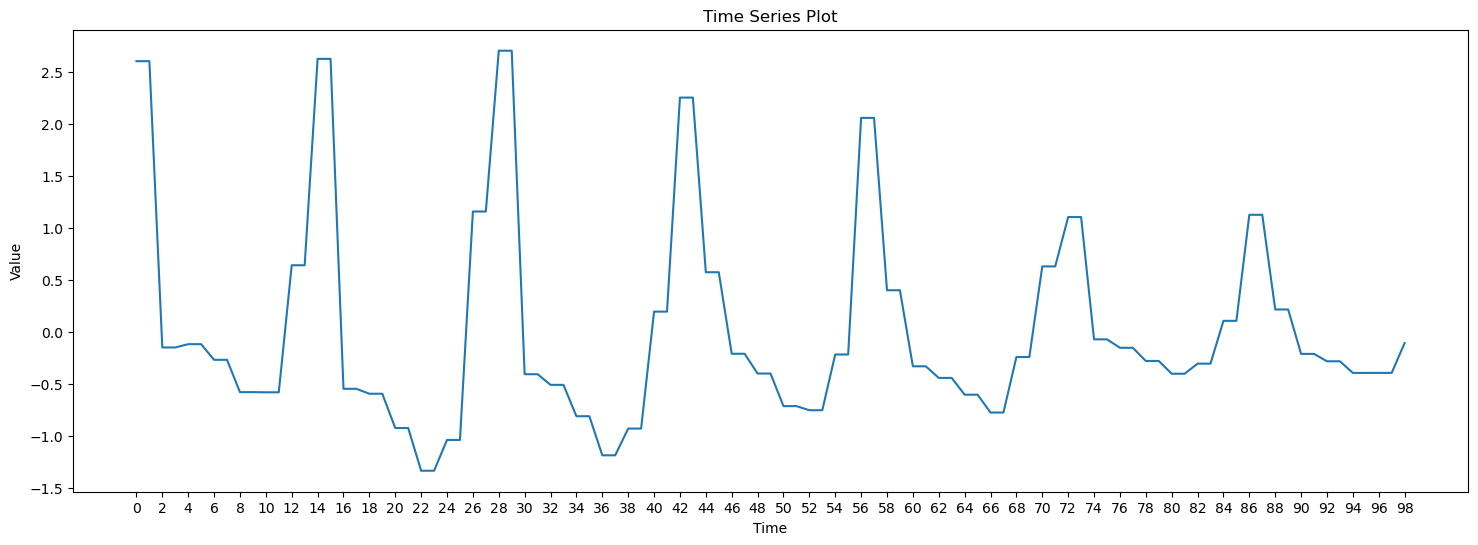

In [5]:
import pandas as pd
import pywt

# Select the first row for demonstration
row = df.iloc[3]

# Extract the time series data (columns '0' to '15')
time_series = row[1:100].astype(float)

# Create the plot
plt.figure(figsize=(18, 6))
plt.plot(time_series)
plt.title('Time Series Plot')
plt.xticks(ticks=time_series.index[::2], labels=time_series.index[::2])
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [6]:
# !pip install matrixprofile-ts

In [7]:
# !pip install stumpy

In [8]:
from matrixprofile import *

In [9]:
time_series

0     2.604227
1     2.604227
2    -0.148083
3    -0.148083
4    -0.116402
        ...   
94   -0.392818
95   -0.392818
96   -0.392691
97   -0.392691
98   -0.105630
Name: 3, Length: 99, dtype: float64

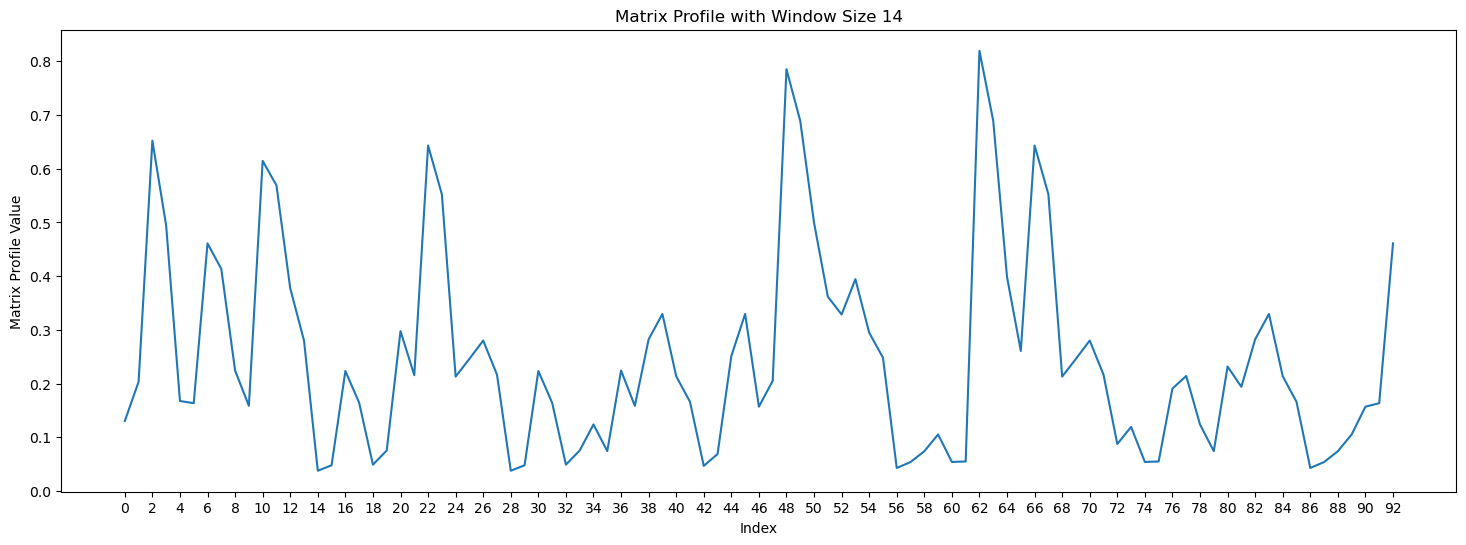

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matrixprofile import matrixProfile

# Window size
w =  7

# Compute matrix profile
mp, mpi = matrixProfile.stomp(time_series.values, w)

# Plot the matrix profile
plt.figure(figsize=(18, 6))
plt.plot(mp)
plt.xticks(np.arange(0, len(mp), 2))
plt.xlabel('Index')
plt.ylabel('Matrix Profile Value')
plt.title('Matrix Profile with Window Size 14')
plt.show()


# Motif Discovery

In [ ]:
m = 7
motifs_list = []

for i in range(len(df)):

    # Supponiamo che tu abbia già definito il DataFrame `df`
    row = df.iloc[i]  # Estrai la riga 3

    # Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
    time_series = row[1:101].astype(float).values

    # Crea la serie temporale
    ts = pd.Series(time_series, index=range(len(time_series)))

    # lunghezza del sottosegmento
    mp, mpi = matrixProfile.stomp(ts.values, w)

    mo, mod = motifs.motifs(ts.values, (mp,mpi), max_motifs=50, radius=0.5)

    # Qui voglio 
    for motif in mo:
        motif_start = int(motif[0])
        motifs_list.append({
            'row_index': i,
            'motif_index': motif_start,
            'motif': time_series[motif_start:motif_start + m]
        })

motifs_df = pd.DataFrame(motifs_list)

In [285]:
# motifs_df['motif'].loc[motifs_df['row_index'] == 3]
motifs_df

,row_index,motif_index,motif
0,0,25,"[-0.8053882880947183, -1.0039901948171364, -1...."
1,0,2,"[3.610550793638141, 3.610550793638141, 2.83035..."
2,0,45,"[0.8337787667807144, 0.7886688189642405, 0.788..."
3,1,0,"[1.1146109625443856, 1.1146109625443856, 2.161..."
4,1,18,"[0.2974242937496539, 0.2974242937496539, -0.24..."
...,...,...,...
4577,1132,13,"[0.0609441899675842, 1.0999752734584545, 1.099..."
4578,1133,18,"[1.038509175046744, 1.038509175046744, -0.2274..."
4579,1133,25,"[-1.488400335001656, -0.9750815129265478, -0.9..."
4580,1133,44,"[0.3401013416905062, 0.3401013416905062, 0.180..."


In [287]:
motifs_counts = motifs_df.groupby('row_index').size()
motifs_counts.mean()

4.040564373897707

In [335]:
import stumpy
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che tu abbia già definito il DataFrame `df`
row = df.iloc[3]  # Estrai la riga 3

# Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
time_series = row[1:101].astype(float).values

# Crea la serie temporale
ts = pd.Series(time_series, index=range(len(time_series)))

m = 7  # lunghezza del sottosegmento
mp, mpi = matrixProfile.stomp(ts.values, w)

mo, mod = motifs.motifs(ts.values, (mp,mpi), max_motifs=50, radius=1)

C:\Users\Lavigi\AppData\Local\Temp\ipykernel_23636\1530821788.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(mo)).colors  # Usa una colormap con 20 colori distinti
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


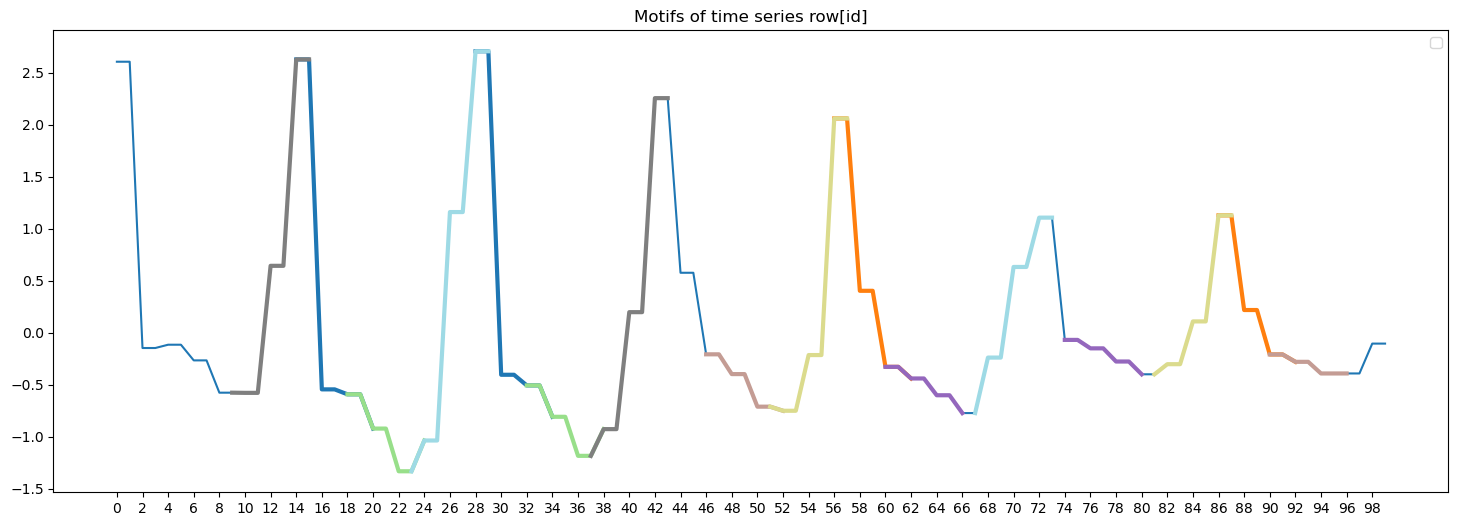

In [336]:
plt.figure(figsize=(18, 6))  # Increase figure width

plt.plot(ts.values)
import matplotlib.cm as cm
import numpy as np

colors = cm.get_cmap('tab20', len(mo)).colors  # Usa una colormap con 20 colori distinti

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

# Adjust x-axis ticks to show every 2 values
plt.xticks(range(0, len(ts), 2))

# Add title
plt.title("Motifs of time series row[id]")

# Show plot
plt.legend()
plt.show()

In [337]:
#!pip install motifs

In [338]:
import pandas as pd
import stumpy
import matplotlib.pyplot as plt

# Extract the time series data (columns '0' to '100')
time_series = row[1:100].astype(float)
time_series = pd.DataFrame(time_series)

window_size = 7
results = {}

# Analizza ogni riga come una serie temporale
for index, row in time_series.iterrows():
    ts = row.dropna().astype(float)
    if len(ts) > window_size:
        mp = stumpy.stump(ts.values, m=window_size)
        mp_profile = mp[:, 0]
        mo, mod = stumpy.motifs(ts.values, mp_profile, max_motifs=3)
        results[index] = {'motifs': mo, 'mod': mod}

# Visualizza i motifs della prima riga
for idx, res in list(results.items())[:3]:
    ts = time_series.iloc[idx].dropna().astype(float).values
    plt.figure(figsize=(10, 4))
    plt.plot(ts, label=f'Time Series {idx}')
    
    for motif in res['motifs']:
        motif_index = int(motif[0])
        plt.plot(range(motif_index, motif_index + window_size),
                 ts[motif_index:motif_index + window_size],
                 label=f'Motif {motif_index}')
    
    plt.title(f'Motif Discovery - Row {idx}')
    plt.legend()
    plt.show()



Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

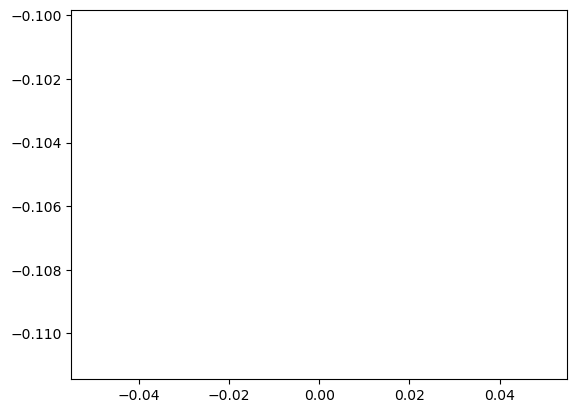

In [339]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

# CLUSTERING

In [ ]:
c = pd.read_csv("ts_standardized.csv")